<a href="https://colab.research.google.com/github/endzix22/machine-learning-bootcamp/blob/main/grid_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
import plotly.express as px

np.random.seed(42)
sns.set(font_scale=1.3)

Wygenerowanie danych

In [2]:
raw_data = make_moons(n_samples=2000, noise=0.25, random_state=42)
data = raw_data[0]
target = raw_data[1]

print(f'{data[:5]}\n')
print(f'{target[:5]}')

[[ 1.58230488  0.36687604]
 [ 0.32765354  0.98236569]
 [ 0.48826986 -0.2467652 ]
 [-0.93742051 -0.02942909]
 [ 0.63439695 -0.41222371]]

[1 0 1 0 1]


In [3]:
df = pd.DataFrame(data=np.c_[data, target], columns=['x1', 'x2', 'target'])
df.head()

,x1,x2,target
0,1.582305,0.366876,1.0
1,0.327654,0.982366,0.0
2,0.488270,-0.246765,1.0
3,-0.937421,-0.029429,0.0
4,0.634397,-0.412224,1.0


Wizualizacja danych

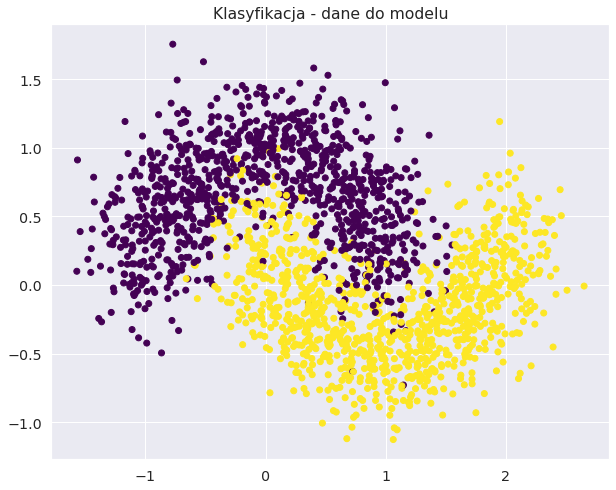

In [4]:
plt.figure(figsize=(10, 8))
plt.scatter(data[:, 0], data[:, 1], c=target, cmap='viridis')
plt.title('Klasyfikacja - dane do modelu')
plt.show()

Podział na zbiór treningowy i testowy

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (1500, 2)
X_test shape: (500, 2)
y_train shape: (1500,)
y_test shape: (500,)


Wizualizacja zbioru treningowego i testowego

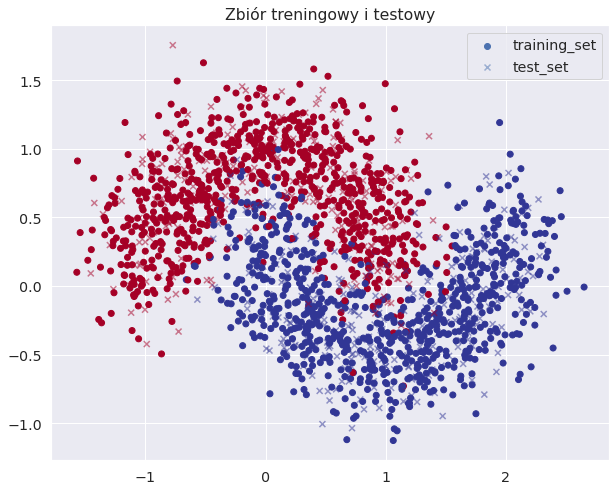

In [6]:
plt.figure(figsize=(10, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='RdYlBu', label = 'training_set')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='RdYlBu', marker='x', alpha=0.5, label='test_set')
plt.title('Zbiór treningowy i testowy')
plt.legend()
plt.show()

Wybór optymalnych hiperparametrów-GRID SEARCH 

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

classifier=DecisionTreeClassifier()

#oczywiscie parametrow mozna wybrac o wiele wiecej

params={'max_depth':np.arange(1,10),
        'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,15,20]}

grid_search=GridSearchCV(classifier,param_grid=params,scoring='accuracy',cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15,
                                              20]},
             scoring='accuracy')

In [11]:
#wysiwetlimy najlepsze nastawy hiperparametrow po metodzie przeszukania siatki 
#wraz z z walidacja krzyzowa nastawiona na cv=5 (5 podzialow)

grid_search.best_params_

{'max_depth': 6, 'min_samples_leaf': 6}

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


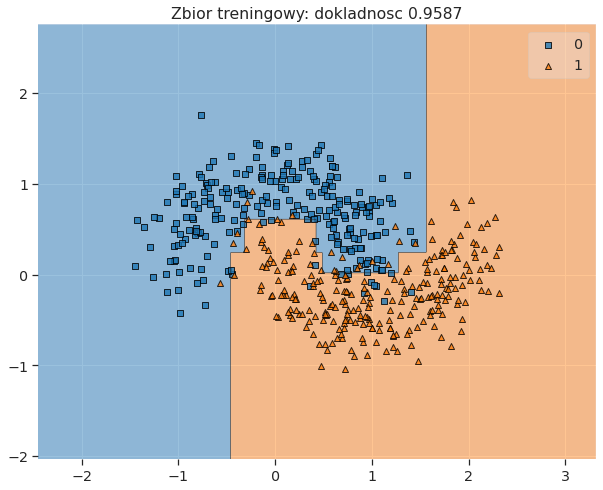

In [13]:
#narysujmy granice decyzyjne naszego modelu 
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(10,8))
plot_decision_regions(X_test,y_test,grid_search)
plt.title(f'Zbior treningowy: dokladnosc {grid_search.score(X_train,y_train):.4f}')
plt.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


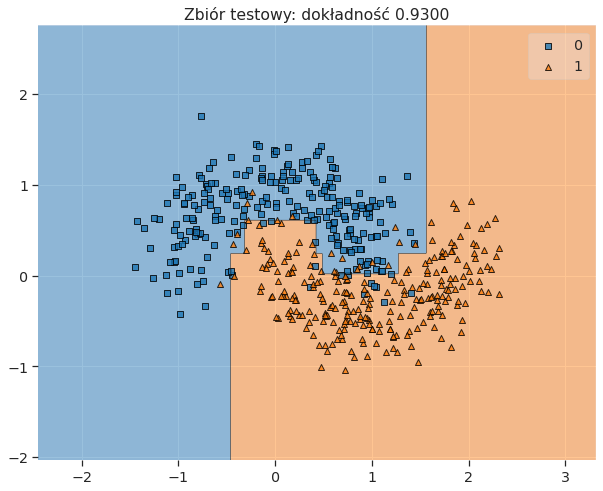

In [14]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, grid_search)
plt.title(f'Zbiór testowy: dokładność {grid_search.score(X_test, y_test):.4f}')
plt.show()

II proba na DecisonTree ale z innymi parametrami

In [16]:
from sklearn.model_selection import GridSearchCV

classifier = DecisionTreeClassifier(random_state=42)

param_grid = {'criterion': ['gini', 'entropy'], 
              'max_depth': np.arange(1, 10), 
              'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]}

grid_search = GridSearchCV(classifier, param_grid=param_grid, n_jobs=-1, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15,
                                              20]},
             scoring='accuracy')

In [17]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 6}

In [18]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_leaf=6, random_state=42)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


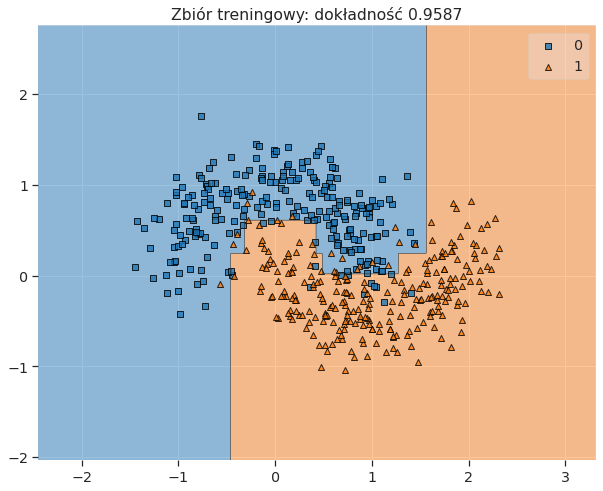

In [19]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, grid_search)
plt.title(f'Zbiór treningowy: dokładność {grid_search.score(X_train, y_train):.4f}')
plt.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


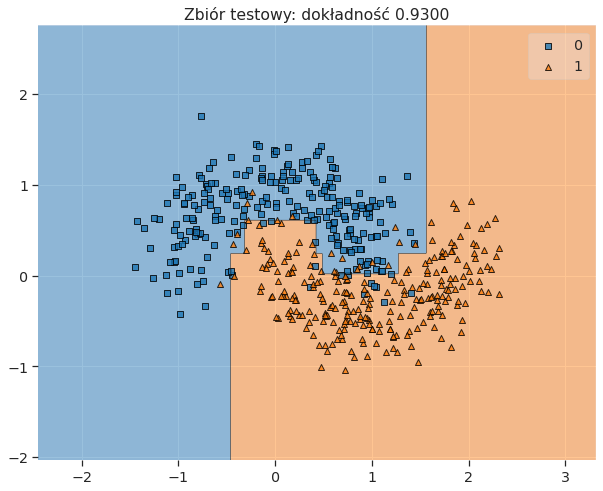

In [20]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, grid_search)
plt.title(f'Zbiór testowy: dokładność {grid_search.score(X_test, y_test):.4f}')
plt.show()

III PROBA -||- 

In [21]:
classifier = DecisionTreeClassifier(random_state=42)

param_grid = [
    {'criterion': ['gini'], 'max_depth': [1, 2, 3, 4, 5]},
    {'criterion': ['entropy'], 'min_samples_leaf': [2, 3, 4, 5]}              
]

grid_search = GridSearchCV(classifier, param_grid=param_grid, n_jobs=-1, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid=[{'criterion': ['gini'], 'max_depth': [1, 2, 3, 4, 5]},
                         {'criterion': ['entropy'],
                          'min_samples_leaf': [2, 3, 4, 5]}],
             scoring='accuracy')

In [22]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [23]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=5, random_state=42)

IV PROBA -||- 

In [24]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(4, 10),
    'min_samples_leaf': [4, 5, 6, 7, 8, 9, 10],
    'n_estimators': [50]
}

grid_search = GridSearchCV(classifier, param_grid=param_grid, n_jobs=-1, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': [4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [50]},
             scoring='accuracy')

In [25]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 4,
 'n_estimators': 50}

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0.5, 1.0, 'Zbiór treningowy: dokładność 0.9613')

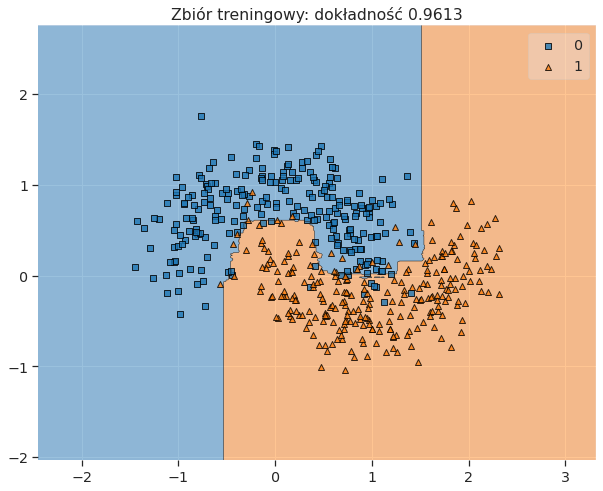

In [26]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, grid_search)
plt.title(f'Zbiór treningowy: dokładność {grid_search.score(X_train, y_train):.4f}')

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0.5, 1.0, 'Zbiór testowy: dokładność 0.9320')

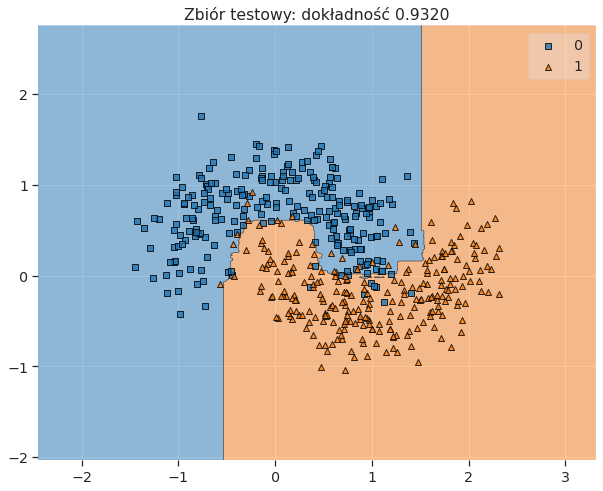

In [27]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, grid_search)
plt.title(f'Zbiór testowy: dokładność {grid_search.score(X_test, y_test):.4f}')